In [1]:
# https://towardsdatascience.com/choosing-the-correct-error-metric-mape-vs-smape-5328dec53fac
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# def mape(y_true, y_pred):
#     return mean_absolute_error(y_true, y_pred) * 100


# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html
# https://stackoverflow.com/questions/47648133/mape-calculation-in-python
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mape(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

# https://stackoverflow.com/questions/49604269/run-all-regressors-against-the-data-in-scikit
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name, if_plot):
    # fit the model
    model.fit(X_train, y_train)

    # predict the values using training data
    train_pred = model.predict(X_train)

    # evaluate using training data
    train_rmse = rmse(y_train, train_pred)
    train_mae = mean_absolute_error(y_train, train_pred)
    train_mape = mape(y_train, train_pred)
    train_r2 = r2_score(y_train, train_pred)
    
    # print the results of the training data
    print("Training data results\n")
    print("Root Mean Squared Error: {:.2f}\n".format(train_rmse))
    print("Mean Absolute Error: {:.2f}".format(train_mae))
    print("Mean Absolute Percentage Error: {:.2f}\n".format(train_mape))
    print("R Square: {:.2f}\n".format(train_r2))
    
    # predict the values using testing data
    test_pred = model.predict(X_test)

    # evaluate using testing data
    test_rmse = rmse(y_test, test_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    test_mape = mape(y_test, test_pred)
    test_r2 = r2_score(y_test, test_pred)
    
        # print the results of the testing data
    print("Testing data results\n")
    print("Root Mean Squared Error: {:.2f}\n".format(test_rmse))
    print("Mean Absolute Error: {:.2f}\n".format(test_mae))
    print("Mean Absolute Percentage Error: {:.2f}\n".format(test_mape))
    print("R Square: {:.2f}\n".format(test_r2))
    
    if if_plot=="Yes":
        plot_model(y_train,y_test,train_pred,test_pred,model_name)
    else:
        print("No plot")
        
    tree_explained=['EXTR','Gradient Boosting','Random Forest','Light GBM','Xgboost','Catboost']
    
    if model_name in tree_explained:
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_train)
        shap.summary_plot(shap_values, X_train, plot_type='bar')
        shap.summary_plot(shap_values, X_train)

        shap.initjs()

#         for i in range(len(X_test)):
#             display(shap.force_plot(explainer.expected_value, shap_values[i], features=X_train.loc[i], 
#             feature_names=X_train.columns))
            
    return train_rmse, train_mae, train_mape, train_r2, test_rmse, test_mae, test_mape, test_r2

def plot_model(y_train,y_test,train_pred,test_pred,model_name):
    
    # Assuming you have a list of time points or indices
    time_points_train = range(len(y_train))
    time_points_test = range(len(y_train), len(y_train) + len(y_test))

    # Create a figure and axis for the time series plot
    plt.figure(figsize=(12, 6))

    # Plot training data
    plt.plot(time_points_train, y_train, label='Actual Train Data', color='blue')

    # Plot testing data
    plt.plot(time_points_test, y_test, label='Actual Test Data', color='green')

    # Plot training predictions
    plt.plot(time_points_train, train_pred, label=str(model_name)+' Train Predictions', color='red')

    # Plot testing predictions
    plt.plot(time_points_test, test_pred, label=str(model_name)+' Test Predictions', color='orange')

    # Add labels and legend
    plt.xlabel('Time/Iterations')
    plt.ylabel('Values')
    plt.legend()

    # Set a title for the plot
    plt.title(str(model_name)+' - Train and Test Data vs. Predictions')

    # Show the plot
    plt.grid(True)
    plt.show()
    


def feature_importance(model, X_train, model_name):
    features = X_train.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)

    # customized number 
    num_features = 25

    plt.figure(figsize=(10,10))
    plt.title('Feature Importances')

    # only plot the customized number of features
    plt.barh(range(num_features), importances[indices[-num_features:]], color='r', align='center')
    plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
    plt.xlabel(str(model_name)+'s Feature Importance')
    plt.show();

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (20,7)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster


In [4]:
## Important
# https://datascience.stackexchange.com/questions/51323/how-to-interpret-metrics-of-a-model-after-scaling-the-data
# https://www.quora.com/When-is-it-necessary-to-normalize-time-series-data-for-predictive-analysis-and-when-is-it-not

In [5]:
timed_df=pd.read_excel("InvoiceData_concate_cleaned_grouped.xlsx")
# timed_df.drop('Date', axis = 1,inplace=True)

In [6]:
# train=timed_df[timed_df['reference_date']<'2023-05-01']

In [7]:
# train.shape

In [8]:
# test=timed_df[timed_df['reference_date']>='2023-05-01']

In [9]:
# test.shape

In [10]:
# train.drop('reference_date', axis = 1,inplace=True)
# test.drop('reference_date', axis = 1,inplace=True)

In [11]:
pd.set_option('display.max_rows', 500)

In [12]:
timed_df = timed_df.set_index('reference_date')
# timed_df = timed_df.rename(columns={'amount_p$_sum': 'y'})

timed_df = timed_df.asfreq('D')
timed_df = timed_df.sort_index()

timed_df

In [16]:
timed_df.columns

Index(['customer_name_top_Customer 1', 'customer_name_top_Customer 2',
       'customer_name_top_Customer 3', 'customer_name_top_Customer 4',
       'customer_name_top_Customer 5', 'customer_name_top_Customer 6',
       'customer_name_top_Customer 7', 'customer_name_top_Customer 8',
       'day_Friday', 'day_Monday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'cdm_end_market_group_Academic & Government',
       'cdm_end_market_group_Diagnostics & Healthcare',
       'cdm_end_market_group_Industrial & Applied',
       'cdm_end_market_group_Pharma & Biotech', 'hfm_custom2_BIDAntibodies',
       'hfm_custom2_BIDAutomation', 'hfm_custom2_BIDCEP',
       'hfm_custom2_BIDCellAndProteinCons',
       'hfm_custom2_BIDCellCultureEssentials',
       'hfm_custom2_BIDCellCulturePlastics', 'hfm_custom2_BIDCtxCellTherapy',
       'hfm_custom2_BIDDiscoveryAdmePrimary', 'hfm_custom2_BIDEPCRReagents',
       'hfm_custom2_BIDGeneModulationAndEditing',
       'hfm_custom2_BIDInstrumentation', 

In [25]:
col='amount_p$_sum'


gc=timed_df.groupby([timed_df['reference_date'].isocalendar().week, timed_df['reference_date'].year])[col].sum().reset_index(name=col)
gc

# pd.merge(gc,timed_df, on=['']

KeyError: 'reference_date'

In [ ]:

grouped = df.groupby(['reference_date', group_col]).size().reset_index(name='count')
pivot_table = pd.pivot_table(grouped, values='count', index=['reference_date'], \
                         columns=group_col, fill_value=0).reset_index()
pivot_table.columns = [str(group_col)+'_'+(col) for col in pivot_table.columns]
pivot_table.rename(columns={str(group_col)+'_reference_date':'reference_date'}, inplace=True)
pivot_table['reference_date'] = pd.to_datetime(pivot_table['reference_date'])
result = pd.merge(pivot_table, timed_df, on="reference_date")




In [ ]:
timed_df['amount_p$_sum']=invoice_df.groupby([invoice_df['reference_date'].dt.date])['amount_p$'].sum()
timed_df['quantity_sum']=invoice_df.groupby([invoice_df['reference_date'].dt.date])['quantity'].sum()

timed_df['amt/qty_mean']=invoice_df.groupby([invoice_df['reference_date'].dt.date])['amt/qty'].mean()

timed_df['fiscal_year']=invoice_df.groupby([invoice_df['reference_date'].dt.date])['fiscal_year'].mean()
timed_df['fiscal_quarter']=invoice_df.groupby([invoice_df['reference_date'].dt.date])['fiscal_quarter'].mean()
timed_df['fiscal_month']=invoice_df.groupby([invoice_df['reference_date'].dt.date])['fiscal_month'].mean()
timed_df['fiscal_quarter_week']=invoice_df.groupby([invoice_df['reference_date'].dt.date])['fiscal_quarter_week'].mean()
timed_df['fiscal_quarter_day']=invoice_df.groupby([invoice_df['reference_date'].dt.date])['fiscal_quarter_day'].mean()
timed_df['fiscal_week']=invoice_df.groupby([invoice_df['reference_date'].dt.date])['fiscal_week'].mean()

In [12]:
timed_df.head(100)

,customer_name_top_Customer 1,customer_name_top_Customer 2,customer_name_top_Customer 3,customer_name_top_Customer 4,customer_name_top_Customer 5,customer_name_top_Customer 6,customer_name_top_Customer 7,customer_name_top_Customer 8,day_Friday,day_Monday,...,dsr_product_sub_summary_SAMPLE PREP,amount_p$_sum,quantity_sum,amt/qty_mean,fiscal_year,fiscal_quarter,fiscal_month,fiscal_quarter_week,fiscal_quarter_day,fiscal_week
reference_date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,1.0,0.0,4.0,0.0,2.0,2.0,1.0,0.0,10.0,0.0,...,1.0,-9.329073e+02,-171.0,139.305873,2021.0,1.0,1.0,1.0,0.6,53.0
2021-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-04,20.0,37.0,113.0,24.0,6.0,9.0,35.0,0.0,0.0,244.0,...,14.0,4.179491e+05,11730.0,552.904864,2021.0,1.0,1.0,1.0,2.0,1.0
2021-01-05,47.0,39.0,176.0,15.0,19.0,9.0,67.0,0.0,0.0,0.0,...,30.0,4.164953e+05,3271.0,306.334041,2021.0,1.0,1.0,1.0,3.0,1.0
2021-01-06,124.0,44.0,163.0,66.0,122.0,55.0,61.0,2.0,0.0,0.0,...,19.0,2.877631e+05,3389.0,230.766045,2021.0,1.0,1.0,1.0,4.0,1.0
2021-01-07,37.0,28.0,83.0,14.0,1.0,31.0,69.0,2.0,0.0,0.0,...,15.0,1.875895e+05,2130.0,158.838617,2021.0,1.0,1.0,1.0,5.0,1.0
2021-01-08,41.0,14.0,116.0,16.0,7.0,39.0,22.0,1.0,256.0,0.0,...,15.0,1.294538e+05,2147.0,206.898454,2021.0,1.0,1.0,1.0,6.0,1.0
2021-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
timed_df.head()

,customer_name_top_Customer 1,customer_name_top_Customer 2,customer_name_top_Customer 3,customer_name_top_Customer 4,customer_name_top_Customer 5,customer_name_top_Customer 6,customer_name_top_Customer 7,customer_name_top_Customer 8,day_Friday,day_Monday,...,dsr_product_sub_summary_SAMPLE PREP,amount_p$_sum,quantity_sum,amt/qty_mean,fiscal_year,fiscal_quarter,fiscal_month,fiscal_quarter_week,fiscal_quarter_day,fiscal_week
reference_date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,20,37,113,24,6,9,35,0,0,244,...,14,417949.079145,11730,552.904864,2021,1,1,1,2.0,1
2021-01-11,39,11,147,16,7,29,34,4,0,287,...,17,90153.491570,3057,186.879260,2021,1,1,1,9.0,2
2021-01-18,43,53,103,17,8,58,32,9,0,323,...,13,326853.375485,3620,273.362670,2021,1,1,1,16.0,3
2021-01-25,54,82,121,47,14,32,30,5,0,385,...,20,597422.084930,6357,176.000679,2021,1,1,1,23.0,4
2021-02-01,42,30,166,30,22,20,24,0,0,334,...,16,526700.021580,8914,206.468191,2021,1,2,2,30.0,5


In [14]:
timed_df=timed_df.fillna(0)

In [15]:
timed_df

,customer_name_top_Customer 1,customer_name_top_Customer 2,customer_name_top_Customer 3,customer_name_top_Customer 4,customer_name_top_Customer 5,customer_name_top_Customer 6,customer_name_top_Customer 7,customer_name_top_Customer 8,day_Friday,day_Monday,...,dsr_product_sub_summary_SAMPLE PREP,amount_p$_sum,quantity_sum,amt/qty_mean,fiscal_year,fiscal_quarter,fiscal_month,fiscal_quarter_week,fiscal_quarter_day,fiscal_week
reference_date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,1.0,0.0,4.0,0.0,2.0,2.0,1.0,0.0,10.0,0.0,...,1.0,-932.907270,-171.0,139.305873,2021.0,1.0,1.0,1.0,0.6,53.0
2021-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-04,20.0,37.0,113.0,24.0,6.0,9.0,35.0,0.0,0.0,244.0,...,14.0,417949.079145,11730.0,552.904864,2021.0,1.0,1.0,1.0,2.0,1.0
2021-01-05,47.0,39.0,176.0,15.0,19.0,9.0,67.0,0.0,0.0,0.0,...,30.0,416495.264155,3271.0,306.334041,2021.0,1.0,1.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2023-08-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2023-08-28,70.0,20.0,132.0,34.0,22.0,23.0,59.0,3.0,0.0,363.0,...,17.0,239079.246995,3479.0,324.387724,2023.0,3.0,8.0,9.0,58.0,35.0


Train dates : 2021-01-01 00:00:00 --- 2023-06-01 00:00:00  (n=882)
Test dates  : 2023-06-02 00:00:00 --- 2023-08-30 00:00:00  (n=90)


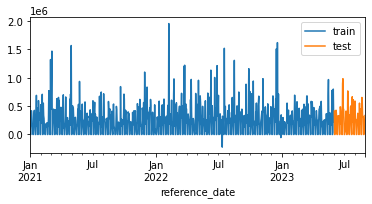

In [16]:
steps = 90
data_train = timed_df[:-steps]
data_test  = timed_df[-steps:]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

fig, ax = plt.subplots(figsize=(6, 2.5))
data_train['amount_p$_sum'].plot(ax=ax, label='train')
data_test['amount_p$_sum'].plot(ax=ax, label='test')
ax.legend();

In [17]:
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=42),
                lags      = 3
             )

forecaster.fit(y=data_train['amount_p$_sum'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=42) 
Lags: [1 2 3] 
Transformer for y: None 
Transformer for exog: None 
Window size: 3 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2021-01-01 00:00:00'), Timestamp('2023-06-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2023-11-15 14:35:24 
Last fit date: 2023-11-15 14:35:24 
Skforecast version: 0.10.1 
Python version: 3.10.4 
F

In [18]:
steps = 90
predictions = forecaster.predict(steps=steps)
predictions.head(5)

2023-06-02    181338.094675
2023-06-03     53223.125925
2023-06-04     19709.604320
2023-06-05     41963.105685
2023-06-06    257380.936164
Freq: D, Name: pred, dtype: float64

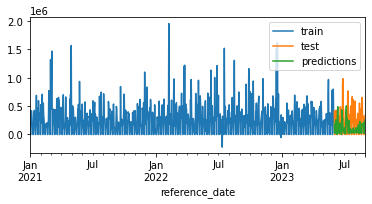

In [19]:
fig, ax = plt.subplots(figsize=(6, 2.5))
data_train['amount_p$_sum'].plot(ax=ax, label='train')
data_test['amount_p$_sum'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [20]:
predictions

2023-06-02    181338.094675
2023-06-03     53223.125925
2023-06-04     19709.604320
2023-06-05     41963.105685
2023-06-06    257380.936164
                  ...      
2023-08-26    207695.414526
2023-08-27     42177.303761
2023-08-28     19319.361277
2023-08-29     41963.105685
2023-08-30    256566.506377
Freq: D, Name: pred, Length: 90, dtype: float64

In [21]:
error_mape = mape(
                y_true = data_test['amount_p$_sum'],
                y_pred = predictions
            )

print(f"Test error (mape): {error_mape}")

Test error (mape): 65.80526384520826


In [22]:
# Hyperparameter grid search
# ==============================================================================
steps = 90
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 3 # This value will be replaced in the grid search
             )

# Lags used as predictors
lags_grid = [10, 20]

# Regressor's hyperparameters
param_grid = {'n_estimators': [100, 500],
              'max_depth': [3, 5, 10]}

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = data_train['amount_p$_sum'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = False,
                        metric             = mape,
                        initial_train_size = int(len(data_train)*0.8),
                        fixed_train_size   = False,
                        return_best        = True,
                        n_jobs             = 'auto',
                        verbose            = False
               )

Number of models compared: 12.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/6 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'max_depth': 10, 'n_estimators': 100}
  Backtesting metric: 448.3030043762806



In [23]:
results_grid

,lags,params,mape,max_depth,n_estimators
10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 100}",448.303004,10,100
11,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 500}",450.613290,10,500
9,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 500}",471.865657,5,500
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 100}",475.473449,5,100
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 100}",483.865474,5,100
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 500}",484.208830,10,500
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 500}",491.211798,5,500
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 500}",494.347115,3,500
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 100}",498.445326,3,100
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 500}",498.490371,3,500


In [24]:
regressor = RandomForestRegressor(max_depth=10, n_estimators=100, random_state=42)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 20
             )

forecaster.fit(y=data_train['amount_p$_sum'])

In [25]:
predictions = forecaster.predict(steps=steps)


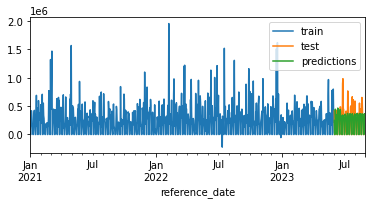

In [26]:
fig, ax = plt.subplots(figsize=(6, 2.5))
data_train['amount_p$_sum'].plot(ax=ax, label='train')
data_test['amount_p$_sum'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();


In [27]:
data_test

,customer_name_top_Customer 1,customer_name_top_Customer 2,customer_name_top_Customer 3,customer_name_top_Customer 4,customer_name_top_Customer 5,customer_name_top_Customer 6,customer_name_top_Customer 7,customer_name_top_Customer 8,day_Friday,day_Monday,...,dsr_product_sub_summary_SAMPLE PREP,amount_p$_sum,quantity_sum,amt/qty_mean,fiscal_year,fiscal_quarter,fiscal_month,fiscal_quarter_week,fiscal_quarter_day,fiscal_week
reference_date,,,,,,,,,,,,,,,,,,,,,
2023-06-02,57.0,17.0,111.0,22.0,14.0,11.0,22.0,5.0,259.0,0.0,...,26.0,413640.017365,5633.0,269.582894,2023.0,2.0,6.0,6.0,62.0,22.0
2023-06-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2023-06-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2023-06-05,100.0,20.0,166.0,46.0,15.0,19.0,62.0,0.0,0.0,428.0,...,18.0,394411.676100,5710.0,225.857189,2023.0,2.0,6.0,6.0,65.0,23.0
2023-06-06,69.0,23.0,114.0,21.0,4.0,27.0,32.0,5.0,0.0,0.0,...,21.0,385281.061250,12079.0,410.886508,2023.0,2.0,6.0,6.0,66.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2023-08-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2023-08-28,70.0,20.0,132.0,34.0,22.0,23.0,59.0,3.0,0.0,363.0,...,17.0,239079.246995,3479.0,324.387724,2023.0,3.0,8.0,9.0,58.0,35.0


In [28]:
predictions

2023-06-02    244450.766603
2023-06-03         0.000000
2023-06-04         0.000000
2023-06-05    445455.636570
2023-06-06    299444.231582
                  ...      
2023-08-26         0.000000
2023-08-27         0.000000
2023-08-28    364017.995245
2023-08-29    345979.766380
2023-08-30    358897.414027
Freq: D, Name: pred, Length: 90, dtype: float64

In [29]:
error_mape = mape(
                y_true = data_test['amount_p$_sum'],
                y_pred = predictions
            )

print(f"Test error (mape): {error_mape}")

Test error (mape): 34.08187166312766


In [30]:
forecaster.get_feature_importances().sort_values('importance',ascending=False)


,feature,importance
6,lag_7,0.350735
13,lag_14,0.138570
2,lag_3,0.067279
18,lag_19,0.044406
5,lag_6,0.042971
4,lag_5,0.040389
1,lag_2,0.040319
3,lag_4,0.035625
14,lag_15,0.029364
17,lag_18,0.029077


In [31]:
timed_df=pd.read_excel("InvoiceData_concate_cleaned_grouped.xlsx")
# timed_df.drop('Date', axis = 1,inplace=True)

In [32]:
timed_df['reference_date'] = pd.to_datetime(timed_df['reference_date'])
timed_df = timed_df.set_index('reference_date')
timed_df = timed_df.asfreq('D')
timed_df = timed_df.sort_index()
timed_df = timed_df.fillna(0)
timed_df.head()

,customer_name_top_Customer 1,customer_name_top_Customer 2,customer_name_top_Customer 3,customer_name_top_Customer 4,customer_name_top_Customer 5,customer_name_top_Customer 6,customer_name_top_Customer 7,customer_name_top_Customer 8,day_Friday,day_Monday,...,dsr_product_sub_summary_SAMPLE PREP,amount_p$_sum,quantity_sum,amt/qty_mean,fiscal_year,fiscal_quarter,fiscal_month,fiscal_quarter_week,fiscal_quarter_day,fiscal_week
reference_date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,1.0,0.0,4.0,0.0,2.0,2.0,1.0,0.0,10.0,0.0,...,1.0,-932.907270,-171.0,139.305873,2021.0,1.0,1.0,1.0,0.6,53.0
2021-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-04,20.0,37.0,113.0,24.0,6.0,9.0,35.0,0.0,0.0,244.0,...,14.0,417949.079145,11730.0,552.904864,2021.0,1.0,1.0,1.0,2.0,1.0
2021-01-05,47.0,39.0,176.0,15.0,19.0,9.0,67.0,0.0,0.0,0.0,...,30.0,416495.264155,3271.0,306.334041,2021.0,1.0,1.0,1.0,3.0,1.0


In [33]:
end_train = '2023-06-01'
data_train = timed_df.loc[: end_train]
data_test  = timed_df.loc[end_train:]

print(f"Dates train      : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Dates test       : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

Dates train      : 2021-01-01 00:00:00 --- 2023-06-01 00:00:00  (n=882)
Dates test       : 2023-06-01 00:00:00 --- 2023-08-30 00:00:00  (n=91)


In [34]:
exog_cols=timed_df.columns.tolist()

In [35]:
exog_cols.remove('amount_p$_sum')
print(exog_cols)

['customer_name_top_Customer 1', 'customer_name_top_Customer 2', 'customer_name_top_Customer 3', 'customer_name_top_Customer 4', 'customer_name_top_Customer 5', 'customer_name_top_Customer 6', 'customer_name_top_Customer 7', 'customer_name_top_Customer 8', 'day_Friday', 'day_Monday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'cdm_end_market_group_Academic & Government', 'cdm_end_market_group_Diagnostics & Healthcare', 'cdm_end_market_group_Industrial & Applied', 'cdm_end_market_group_Pharma & Biotech', 'hfm_custom2_BIDAntibodies', 'hfm_custom2_BIDAutomation', 'hfm_custom2_BIDCEP', 'hfm_custom2_BIDCellAndProteinCons', 'hfm_custom2_BIDCellCultureEssentials', 'hfm_custom2_BIDCellCulturePlastics', 'hfm_custom2_BIDCtxCellTherapy', 'hfm_custom2_BIDDiscoveryAdmePrimary', 'hfm_custom2_BIDEPCRReagents', 'hfm_custom2_BIDGeneModulationAndEditing', 'hfm_custom2_BIDInstrumentation', 'hfm_custom2_BIDMolecularTools', 'hfm_custom2_BIDNeuroAndStemCells', 'hfm_custom2_BIDOEM', 'hfm_custom2_BIDProt

In [36]:
forecaster = ForecasterAutoreg(
                 regressor        = XGBRegressor(random_state=42),
                 lags             = 20 )

In [37]:
# # exog_features = exog_cols
                 
# X_train, y_train = forecaster.create_train_X_y(
#                         y = timed_df.loc[:end_train, 'amount_p$_sum'],
#                         exog = timed_df.loc[:end_train, exog_cols]
#                    )
# X_train.head(3)

In [38]:
# Grid search of hyperparameters and lags
# ==============================================================================
# Regressor hyperparameters
param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1]
}

# Lags used as predictors
lags_grid = [48, 72]

results_grid = grid_search_forecaster(
                   forecaster         = forecaster,
                   y                  = timed_df.loc[:end_train, 'amount_p$_sum'],
                   exog               = timed_df.loc[:end_train, exog_cols],
                   param_grid         = param_grid,
                   lags_grid          = lags_grid,
                   steps              = 90,
                   refit              = False,
                   metric             = mape,
#                    initial_train_size = len(timed_df.loc[:end_train]),
                   initial_train_size = int(len(data_train)*0.8),
                   fixed_train_size   = False,
                   return_best        = True,
                   n_jobs             = 'auto',
                   verbose            = False
               )

Number of models compared: 24.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/12 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48] 
  Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}
  Backtesting metric: 30.324851040953003



In [39]:
regressor = XGBRegressor(max_depth=5, n_estimators=100, learning_rate=0.01 ,random_state=42)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 72
             )

forecaster.fit(y=data_train['amount_p$_sum'])

In [40]:
predictions = forecaster.predict(steps=90)


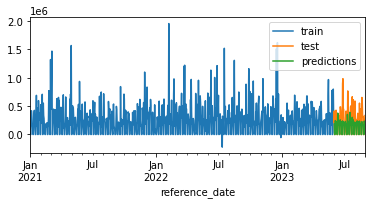

In [41]:
fig, ax = plt.subplots(figsize=(6, 2.5))
data_train['amount_p$_sum'].plot(ax=ax, label='train')
data_test['amount_p$_sum'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();


In [42]:
predictions

2023-06-02    179327.843750
2023-06-03         0.183815
2023-06-04         0.183815
2023-06-05    245628.765625
2023-06-06    184122.343750
                  ...      
2023-08-26         0.183815
2023-08-27         0.183815
2023-08-28    235291.625000
2023-08-29    184923.765625
2023-08-30    202649.562500
Freq: D, Name: pred, Length: 90, dtype: float64

In [46]:
data_test['amount_p$_sum'][1:]

reference_date
2023-06-02    413640.017365
2023-06-03         0.000000
2023-06-04         0.000000
2023-06-05    394411.676100
2023-06-06    385281.061250
                  ...      
2023-08-26         0.000000
2023-08-27         0.000000
2023-08-28    239079.246995
2023-08-29    184370.839800
2023-08-30    333838.450520
Freq: D, Name: amount_p$_sum, Length: 90, dtype: float64

In [47]:
error_mape = mape(
                y_true = data_test['amount_p$_sum'][1:],
                y_pred = predictions
            )

print(f"Test error (mape): {error_mape}")

Test error (mape): 31.90488087843173


In [49]:
forecaster.get_feature_importances().sort_values('importance',ascending=False).head(20)


,feature,importance
6,lag_7,0.134706
13,lag_14,0.063414
20,lag_21,0.058478
69,lag_70,0.052322
60,lag_61,0.029712
26,lag_27,0.027427
40,lag_41,0.025155
57,lag_58,0.023980
54,lag_55,0.022130
31,lag_32,0.021650


In [36]:
importance = forecaster.get_feature_importances()
importance.sort_values('importance',ascending=False).head(20)

,feature,importance
90,dsr_product_sub_summary_BID MOLECULAR,0.264487
48,customer_name_top_Customer 1,0.231201
78,hfm_custom2_BIDOEM,0.054648
100,fiscal_year,0.032143
31,lag_32,0.026020
64,cdm_end_market_group_Pharma & Biotech,0.018883
98,quantity_sum,0.018251
99,amt/qty_mean,0.016723
84,hfm_custom2_BIDServiceContract,0.014853
73,hfm_custom2_BIDEPCRReagents,0.014590
